# Hands-on

Write a simulation for a magnetic field of a solenoid, per [general current loop approximation](https://github.com/tatpongkatanyukul/Learn/blob/main/antenna/solenoid.md)

# TOC

* [Current loop](#CurrentLoop)
* [Visualization example (correct way to do)](#Visualization)
* [Solenoid by current loops](#SolenoidByCurrentLoops)

# Current Loop
<a class="anchor" id="CurrentLoop"></a>

![CurrentLoop3](https://gitlab.en.kku.ac.th/tatpong/resources/-/raw/main/Images/CurrentLoop3.png?inline=false)

(See [Current loop analysis](https://github.com/tatpongkatanyukul/Learn/blob/main/antenna/solenoid.md) for detial)

Magnetic field at position $(x,y,z)$ from a current loop of $R$ radius, locating on xy-plane (z=0) with center at the origin:

$$\vec{B} = \frac{\mu_0 I R}{4 \pi} \int_0^{2 \pi} \frac{r_z \hat{\rho} - r_\rho \hat{z}}{r^2} d \theta$$

or, in cartesian system,

$$\vec{B} = \frac{\mu_0 I}{4 \pi} \int_0^{2 \pi} \frac{1}{r^3} (\hat{x} R z \cos \theta + \hat{y} R z \sin \theta - \hat{z} (R \sin \theta (y - R \sin \theta) + R \cos \theta (x - R \cos \theta) ) d \theta$$

where

* $\hat{r} = sign(\hat{n} \cdot \hat{r}) \frac{\sqrt{(x - R \cos \theta)^2+(y - R \sin \theta)^2}}{r} \hat{\rho} + \tan^{-1} \left(\frac{y - R \sin \theta}{x - R \cos \theta} \right) \hat{\varphi} + \frac{z}{r} \hat{z}$
  * $r_\rho = sign(\hat{n} \cdot \hat{r}) \frac{\sqrt{(x - R \cos \theta)^2+(y - R \sin \theta)^2}}{r}$
  * $r_z = \frac{z}{r}$

* $sign(\hat{n} \cdot \hat{r}) = sign(\cos \theta (x - R \cos \theta ) + \sin \theta (y - R \sin \theta) )$

* $r = \sqrt{(x - R \cos \theta)^2 + (y - R \sin \theta)^2 + z^2}$


## Cartesian-version implementation

### Loop center is at (0, 0, 0) and loop is lying flat on xy-plane (z = 0)

A more general case can be achieved through translation.

$$\vec{B} = \frac{\mu_0 I}{4 \pi} \int_0^{2 \pi} \frac{1}{r^3} (\hat{x} R z \cos \theta + \hat{y} R z \sin \theta - \hat{z} (R \sin \theta (y - R \sin \theta) + R \cos \theta (x - R \cos \theta) ) d \theta$$

can be broken down to each dimension: $\vec{B} = B_x \hat{x} + B_y \hat{y} + B_z \hat{z}$ and

* $B_x = K \int_0^{2 \pi} \frac{1}{r^3} R z \cos \theta d \theta$
* $B_y = K \int_0^{2 \pi} \frac{1}{r^3} R z \sin \theta d \theta$
* $B_z = -K \int_0^{2 \pi} \frac{1}{r^3} R (\sin \theta (y - R \sin \theta) +  \cos \theta (x - R \cos \theta) ) d \theta$
* where $r = \sqrt{(x - R \cos \theta)^2 + (y - R \sin \theta)^2 + z^2}$
* and $K = \frac{\mu_0 I}{4 \pi}$.

In [1]:
from math import sqrt, pi, sin, cos

In [2]:
def dB(Point, LoopR, LoopI, mu0, theta):
    '''
    Point: a coordinate of a point of interest in tuple (x, y, z).
    LoopR: a radius of the loop.
    LoopI: a current flowing in the loop: I > 0 ccw from top view and vice versa.
    mu0: permeability of free space
    Use math function from ```math``` library. It will be graded without numpy.
    '''
    x, y, z = Point
    R = LoopR

    K = mu0 * LoopI/(4 * pi)
    r = lambda theta: sqrt( (x - R*cos(theta))**2 + \
                                 (y - R*sin(theta))**2 + \
                                 z**2)
    dBx = lambda theta: K/r(theta)**3 * R*z*cos(theta)
    dBy = lambda theta: K/r(theta)**3 * R*z*sin(theta)
    dBz = lambda theta: -K/r(theta)**3 * R*(sin(theta)*(y - R*sin(theta)) + \
                                            cos(theta)*(x - R*cos(theta)))

    return dBx(theta), dBy(theta), dBz(theta)

In [6]:
# Test dB
P = (0, 0, 10)
R = 1
I = 0.3
mu0 = 4e-7 * pi
theta = 0

for t in [0, pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 2*pi]:
    print(t, ':', dB(P, R, I, mu0, theta))


0 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)
0.7853981633974483 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)
1.5707963267948966 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)
2.356194490192345 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)
3.141592653589793 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)
3.9269908169872414 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)
4.71238898038469 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)
6.283185307179586 : (2.9555560105247215e-10, 0.0, 2.955556010524721e-11)


### Numerical integration

In [3]:
# Numerical integration: midpoint rule

def integrate_n(fx, xa, xb, n):
    '''
    Numerical integration with midpoint rule.
    fx: a function to be integrated.
    xa: an initial point of integration.
    xb: a final point of integration.
    n: a number of subintevals.
    '''

    dx = (xb - xa)/n

    # lower end of the subinterval
    sl = xa
    Mn = 0
    for i in range(n):
        mi = sl + dx/2
        Mn += fx(mi) * dx

        # Prep sl for the next subinterval 
        sl = sl + dx
    # end for i
    return Mn

In [ ]:
# Test

# int_1^4 x^2 
f1 = lambda x: x**3

integrate_n(f1, 0, 1, 1000)

0.2499998750000005

In [ ]:
#from sympy import symbols, integrate, sin, exp, pi
# Do not run this, otherwise it will mess up sin, pi from math library!

In [ ]:
# xp = symbols('xp')

# integrate(xp**3, (xp, 0, 1))

In [ ]:
f2 = lambda x: x**2

# Numerical integration under test
r = integrate_n(f2, 1, 4, 1000)
print('integral=', r)

# # Sympy integrate
# integrate(xp**2, (xp, 1, 4))

integral= 20.999997750000006


In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [ ]:
f2 = lambda x: np.sin(x)

# Numerical integration under test
r = integrate_n(f2, 0, np.pi, 1000)
print('integral=', r)

# Sympy integrate
# integrate(sin(xp), (xp, 0, pi))

integral= 2.000000822467294


In [6]:
def BVec(Point, LoopR, LoopI, mu0, N=1000):
    '''
    Point: a coordinate of a point of interest in tuple (x, y, z).
    LoopR: a radius of the loop.
    LoopI: a current flowing in the loop: I > 0 ccw from top view and vice versa.
    mu0: permeability of free space
    N: meta-parameter of numerical integration: a number of subintervals
    Use math function from ```math``` library. It will be graded without numpy.

    Call dB and numerical integration so that it can be checked in smaller steps.
    '''

    x, y, z = Point
    R = LoopR

    K = mu0 * LoopI/(4 * pi)
    r = lambda theta: sqrt( (x - R*cos(theta))**2 + \
                                 (y - R*sin(theta))**2 + \
                                 z**2)
    dBx = lambda theta: K/r(theta)**3 * R*z*cos(theta)
    dBy = lambda theta: K/r(theta)**3 * R*z*sin(theta)
    dBz = lambda theta: -K/r(theta)**3 * R*(sin(theta)*(y - R*sin(theta)) + \
                                            cos(theta)*(x - R*cos(theta)))

    # Integrate dB
    Bx = integrate_n(dBx, 0, 2*pi, N)
    By = integrate_n(dBy, 0, 2*pi, N)    
    Bz = integrate_n(dBz, 0, 2*pi, N)

    return Bx, By, Bz

In [ ]:
# Test

Point = (0, 0, 0)
R = 2
I = 0.3
mu0 = 4e-7 * pi

vB = BVec(Point, R, I, mu0, 1000)
print(vB)

(0.0, 0.0, 9.424777960769281e-08)


### Test current loop

Per Fleish (A Student Guide to Maxwells Equations)

Circular loop of radius $R$ carrying current $I$
(loop in $xy$ plane, at distance $z$ along $z$-axis)

$$\vec{B} = \frac{\mu_0 I R^2}{2(z^2 + R^2)^{3/2}} \hat{z}$$



In [11]:
def Bcloop(z, loopR, loopI, mu0):
    R = loopR
    I = loopI
    Bz = mu0*I*R**2/(2*(z**2 + R**2)**(3/2))

    return Bz

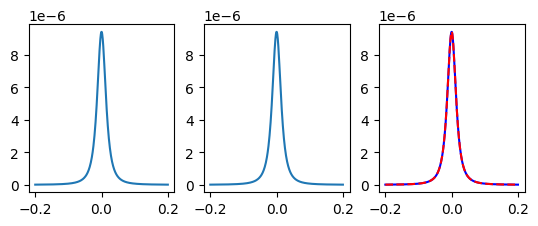

In [ ]:
R = 0.02
I = 0.3
mu0 = 4e-7 * pi

zs = np.linspace(-0.2, 0.2, 500)

Bzs = Bcloop(zs, R, I, mu0)

vBs = np.zeros((500,3))
for i, z in enumerate(zs):
    Point = (0, 0, z)
    vBs[i] = BVec(Point, R, I, mu0, 1000)

plt.subplot(2,3,1)
plt.plot(zs, Bzs)
plt.subplot(2,3,2)
plt.plot(zs, vBs[:,2])
plt.subplot(2,3,3)
plt.plot(zs, Bzs, 'b')
plt.plot(zs, vBs[:,2], 'r--')

In [ ]:
Bcloop(-0.2, R, I, mu0)

9.285153049937617e-09

In [ ]:
BVec((0,0,-0.2), R, I, mu0, 1000)

(8.31238967433366e-22, 1.6950076808334642e-21, 9.285153049937702e-09)

In [ ]:
R = 0.02
I = 0.3
mu0 = 4e-7 * pi

zs = [-0.2]
for i, z in enumerate(zs):
    Point = (0, 0, z)
    Bx, By, Bz = BVec(Point, R, I, mu0, 1000)
    print(Bz)
    # print('z = {}; B = ( {:.4f} x 10^-22|x> + {:.4f} x 10^-22|y> + {:.4f} x 10^-9|z> ) '.format(z, Bx*1e22, By*1e22, Bz*1e9))



9.285153049937702e-09


In [ ]:
Point

(0, 0, -0.2)

In [ ]:
BVec(Point, R, I, mu0, 1000)

(8.31238967433366e-22, 1.6950076808334642e-21, 9.285153049937702e-09)

In [ ]:
BVec((0, 0, -0.2), R, I, mu0, 1000)

(8.31238967433366e-22, 1.6950076808334642e-21, 9.285153049937702e-09)

### Examine magnetic field

## ```CurrentLoop``` class

In [7]:
class CurrentLoop:
    '''
    Current loop whose center is at (0, 0, z) with radius R and current I.
    Direction of current I:
    I > 0 means counter-clockwise looking from +z.
    I < 0 means clockwise looking from +z. 
    '''
    def __init__(self, z, R, I, mu0):
        self.z = z
        self.R = R
        self.I = I
        self.mu0 = mu0

    def compute_B(self, X, Y, Z, N=1000):
        '''
        X: field range along x-axis
        Y: field range along y-axis
        Z: field range along z-axis
        '''
        # Since the loop is at self.z off the origin (0,0,0),
        # we need to offset this on Z.
        Zp = np.array(Z) - self.z

        Bx = np.zeros((len(X), len(Y), len(Zp)))
        By = np.zeros((len(X), len(Y), len(Zp)))
        Bz = np.zeros((len(X), len(Y), len(Zp)))

        # Compute each B at each point in volume X . Y . Zp
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                for k, z in enumerate(Zp):
                    Bx[i,j,k], By[i,j,k], Bz[i,j,k] = \
                    BVec((x,y,z), self.R, self.I, self.mu0, N)
                # end for k
            # end for i
        #end for j  

        return Bx, By, Bz
    # end def

In [ ]:
# Prelim test
mu0 = 4e-7 * pi
cl = CurrentLoop(0, 0.02, 0.3*10, mu0)

In [ ]:
Xs = np.arange(-0.03, 0.06, 0.007)             # Make it an odd number and avoid 0.02 (touch the loop)
Ys = np.arange(-0.03, 0.04, 0.007)             # Make it an odd number and avoid 0.02 (touch the loop)
Zs = np.arange(-0.02, 0.07, 0.007)

Bx, By, Bz = cl.compute_B(Xs, Ys, Zs, N=100)

In [ ]:
print(len(Xs))
print(len(Ys))
print(len(Zs))

13
10
13


Note every range has size to be odd for proper plot. 
```imshow``` starts plot from top to bottom, but we trick it to look like from bottom to top.

---



In [8]:
def unitvec(Fx, Fy, Fz):
    '''
    F: field in shape (nx, ny, nz)
    '''

    Fmag = np.sqrt(Fx**2 + Fy**2 + Fz**2)
    Ux = Fx/Fmag
    Uy = Fy/Fmag
    Uz = Fz/Fmag

    return Ux, Uy, Uz, Fmag

In [ ]:
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

[-0.02  -0.013 -0.006  0.001  0.008  0.015  0.022  0.029  0.036  0.043
  0.05   0.057  0.064]


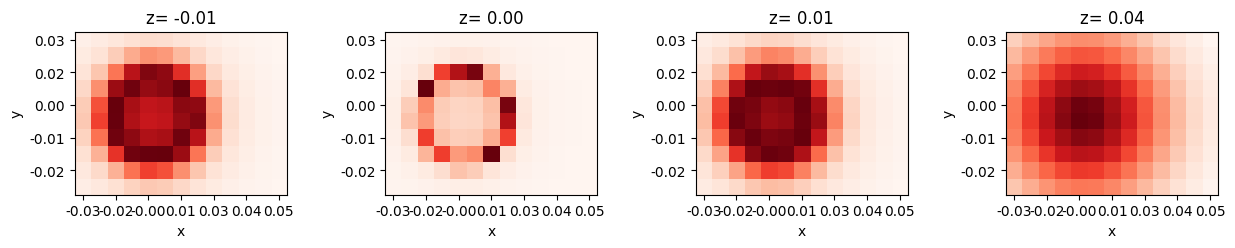

In [ ]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

print(Zs)
for n, i in enumerate([2, 3, 4, 8]):
    plt.subplot(1,4,n+1)
    plt.imshow(magB[:,::-1,i].T, cmap = 'Reds' , interpolation = 'nearest' )
    plt.title('z= {:.2f}'.format(Zs[i]))
    plt.xlabel('x')
    plt.ylabel('y')
    ax[n].set_xticks(list(range(len(Xs)))[::2])             # Tick every other points
    ax[n].set_xticklabels(["{:.2f}".format(x) for x in Xs[::2]])

    ax[n].set_yticks(list(range(len(Ys)))[::2])             # Tick every other points
    ax[n].set_yticklabels(["{:.2f}".format(y) for y in Ys[::-1][::2]])


[-0.03  -0.023 -0.016 -0.009 -0.002  0.005  0.012  0.019  0.026  0.033]


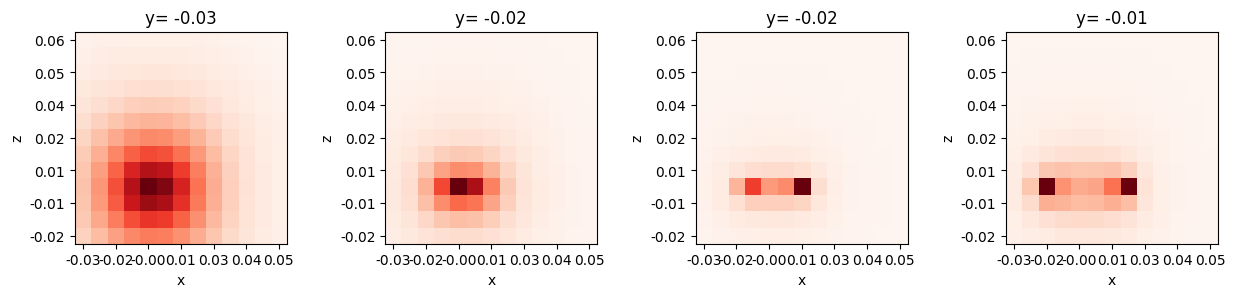

In [ ]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

print(Ys)
for n, i in enumerate([0, 1, 2, 3]):
    plt.subplot(1,4,n+1)
    plt.imshow(magB[:,i,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
    plt.title('y= {:.2f}'.format(Ys[i]))
    plt.xlabel('x')
    plt.ylabel('z')
    ax[n].set_xticks(list(range(len(Xs)))[::2])             # Tick every other points
    ax[n].set_xticklabels(["{:.2f}".format(x) for x in Xs[::2]])

    ax[n].set_yticks(list(range(len(Zs)))[::2])             # Tick every other points
    ax[n].set_yticklabels(["{:.2f}".format(z) for z in Zs[::-1][::2]])


## Visualization example: nice plot for illustration
<a class="anchor" id="Visualization"></a>


In [ ]:
mu0 = 4e-7 * pi
cl = CurrentLoop(0, 0.02, 0.3*10, mu0)

Xs = np.arange(-0.04, 0.04, 0.003)             # Make it an odd number and avoid 0.02 (touch the loop)
Ys = np.arange(-0.04, 0.04, 0.003)             # Make it an odd number and avoid 0.02 (touch the loop)
Zs = np.arange(-0.04, 0.04, 0.003)

Bx, By, Bz = cl.compute_B(Xs, Ys, Zs, N=100)
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

Scale mapping

* Logical: x: min(x) to max(x)
* Plot: x: 0 to len(Xs)-1

$\frac{x_p - min(x_p)}{max(x_p) - min(x_p)} = \frac{x - min(x)}{max(x) - min(x)}$ 

In [ ]:
Xs

array([-0.04 , -0.037, -0.034, -0.031, -0.028, -0.025, -0.022, -0.019,
       -0.016, -0.013, -0.01 , -0.007, -0.004, -0.001,  0.002,  0.005,
        0.008,  0.011,  0.014,  0.017,  0.02 ,  0.023,  0.026,  0.029,
        0.032,  0.035,  0.038])

In [ ]:
R = 0.02

# scaled coordinate / not absolute coordinate
xl = 0
xp = (xl - np.min(Xs))/(np.max(Xs) - np.min(Xs)) * (len(Xs)-1) + 0
yl = 0 
yp = (yl - np.min(Ys))/(np.max(Ys) - np.min(Ys)) * (len(Ys)-1) + 0
zl = 0
zp = (zl - np.min(Zs))/(np.max(Zs) - np.min(Zs)) * (len(Zs)-1) + 0

Rl1 = -R
Rp1 = (Rl1 - np.min(Xs))/(np.max(Xs) - np.min(Xs)) * (len(Xs)-1) + 0

Rl2 = R
Rp2 = (Rl2 - np.min(Xs))/(np.max(Xs) - np.min(Xs)) * (len(Xs)-1) + 0


print('xp=', xp, '; len(Xs)=', len(Xs))
print('Yp=', yp, '; len(Ys)=', len(Ys))
print('Zp=', zp, '; len(Zs)=', len(Zs))
print('Rp1=', Rp1)
print('Rp2=', Rp2)

xp= 13.333333333333321 ; len(Xs)= 27
Yp= 13.333333333333321 ; len(Ys)= 27
Zp= 13.333333333333321 ; len(Zs)= 27
Rp1= 6.666666666666661
Rp2= 19.999999999999982


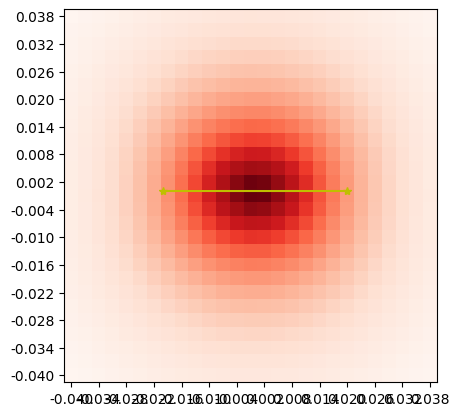

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout(rect=[0.1, 0.1, 1, 1], h_pad=4, w_pad=4)

i = 4
plt.imshow(magB[:,i,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
ax.set_xticks(list(range(len(Xs)))[::2])             # Tick every other points
ax.set_xticklabels(["{:.3f}".format(x) for x in Xs[::2]])

ax.set_yticks(list(range(len(Zs)))[::2])             # Tick every other points
ax.set_yticklabels(["{:.3f}".format(z) for z in Zs[::-1][::2]])


# plt.plot([xp], [len(Zs) - 1 - zp], 'k*')
plt.plot([Rp1, Rp2], len(Zs) - 1 - np.array([zp, zp]), 'y*-')

# plt.plot([0, len(Xs)-1], 2*[len(Zs) - 1 - zp], 'gx')
# plt.plot([0, 1, 2, 3, 4], [0, 1, 2, 3, 4], 'm+')
# plt.plot([0, 0.5, 1], [0, 0, 0], 'co')

In [ ]:
Zs

array([-0.04 , -0.037, -0.034, -0.031, -0.028, -0.025, -0.022, -0.019,
       -0.016, -0.013, -0.01 , -0.007, -0.004, -0.001,  0.002,  0.005,
        0.008,  0.011,  0.014,  0.017,  0.02 ,  0.023,  0.026,  0.029,
        0.032,  0.035,  0.038])

In [ ]:
len(Zs)

27

In [ ]:
Rp2

19.999999999999982

In [ ]:
len(Xs)

27

[-0.04  -0.037 -0.034 -0.031 -0.028 -0.025 -0.022 -0.019 -0.016 -0.013
 -0.01  -0.007 -0.004 -0.001  0.002  0.005  0.008  0.011  0.014  0.017
  0.02   0.023  0.026  0.029  0.032  0.035  0.038]
[-0.04  -0.037 -0.034 -0.031 -0.028 -0.025 -0.022 -0.019 -0.016 -0.013
 -0.01  -0.007 -0.004 -0.001  0.002  0.005  0.008  0.011  0.014  0.017
  0.02   0.023  0.026  0.029  0.032  0.035  0.038]


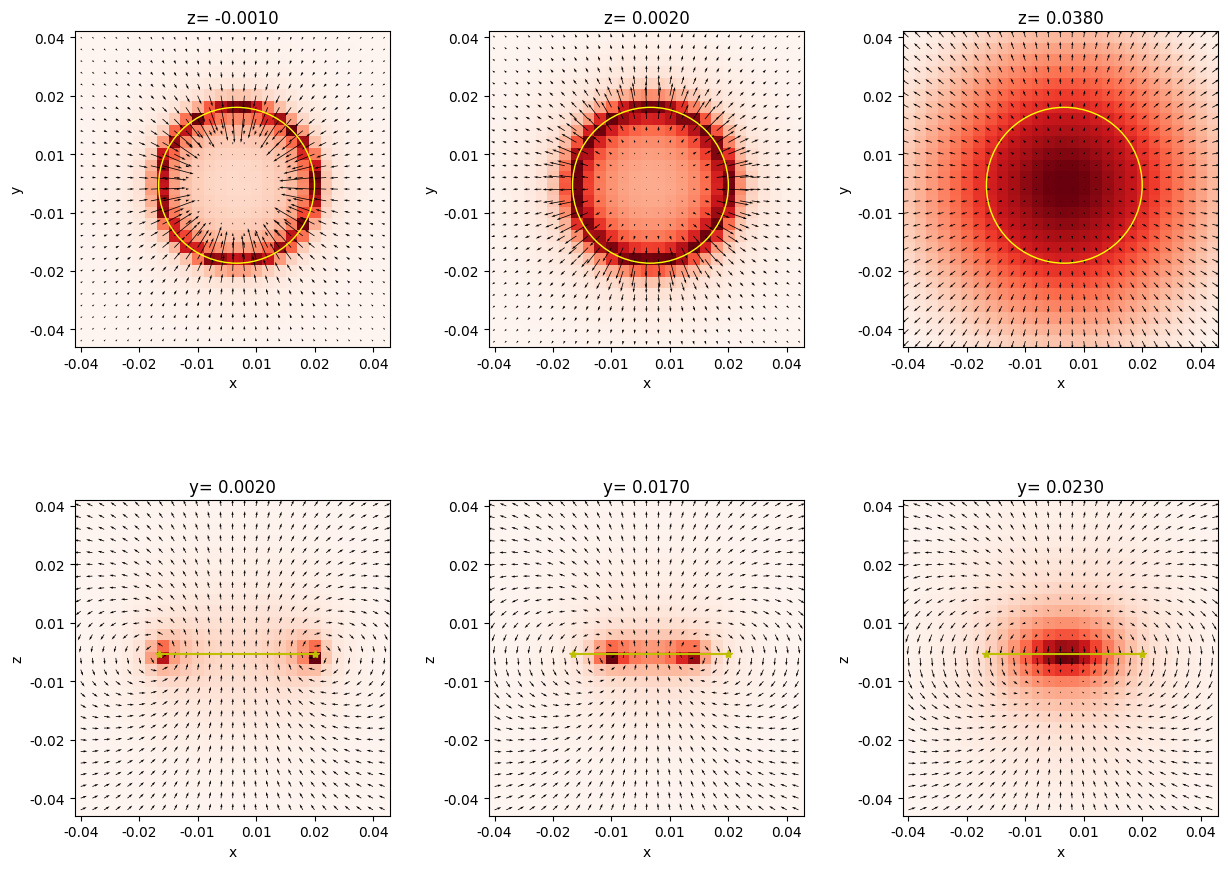

In [ ]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

print(Zs)
for n, i in enumerate([13, 14, 26]):
    plt.subplot(2,3,n+1)
    plt.imshow(magB[:,::-1,i].T, cmap = 'Reds' , interpolation = 'nearest' )
    plt.title('z= {:.4f}'.format(Zs[i]))
    plt.xlabel('x')
    plt.ylabel('y')
    m = 5
    ax[0,n].set_xticks(list(range(len(Xs)))[::m])             # Tick every m points
    ax[0,n].set_xticklabels(["{:.2f}".format(x) for x in Xs[::m]])

    ax[0,n].set_yticks(list(range(len(Ys)))[::m])             # Tick every m points
    ax[0,n].set_yticklabels(["{:.2f}".format(y) for y in Ys[::-1][::m]])

    plt.quiver(uBx[:,::-1,i].T, uBy[:,::-1,i].T)

    ax[0,n].set_aspect( 1 )
    loopcircle = plt.Circle(( xp , len(Ys) - 1 - yp ), (Rp2 - Rp1)/2, color='yellow', fill=False)
    ax[0,n].add_artist(loopcircle)

print(Ys)
for n, i in enumerate([14, 19, 21]):
    plt.subplot(2,3,n+4)
    plt.imshow(magB[:,i,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
    plt.title('y= {:.4f}'.format(Ys[i]))
    plt.xlabel('x')
    plt.ylabel('z')
    m = 5
    ax[1,n].set_xticks(list(range(len(Xs)))[::m])             # Tick every m points
    ax[1,n].set_xticklabels(["{:.2f}".format(x) for x in Xs[::m]])

    ax[1,n].set_yticks(list(range(len(Zs)))[::m])             # Tick every m points
    ax[1,n].set_yticklabels(["{:.2f}".format(z) for z in Zs[::-1][::m]])

    plt.quiver(uBx[:,i, ::-1].T, uBz[:,i, ::-1].T)


    plt.plot([Rp1, Rp2], len(Zs) - 1 - np.array([zp, zp]), 'y*-')

## Work out numbers for students

### Case 1

In [14]:
mu0 = 4e-7 * pi

res = 0.001
R = 0.0015
CurrentI = 3

# Make it an odd number and avoid R (touch the loop)
Xs = np.arange(0, res, res)
# Xs = np.arange(-R*20, R*20, res)                                            
Ys = np.arange(-R*20, R*20, res)[:59]
Zs = np.arange(-R*10, R*30, res)[:59]


In [ ]:
print(len(Xs))
print(len(Ys))
print(len(Zs))


1
59
59


In [15]:
cl = CurrentLoop(0, R, CurrentI, mu0)
Bx, By, Bz = cl.compute_B(Xs, Ys, Zs, N=100)

In [16]:
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

cix: x= 0.00
ciy: y= 0.00


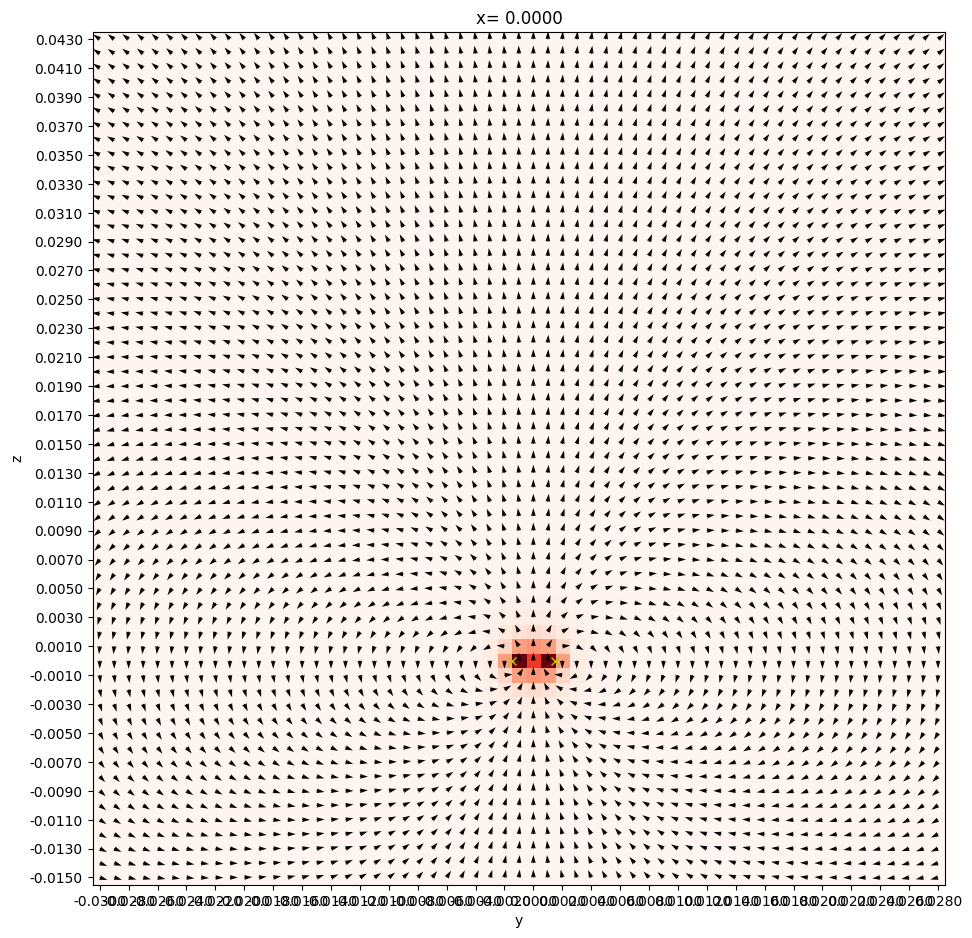

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

# Scaled coordinate / not absolute coordinate, for loop plot
cix = 0; print('cix: x= {:.2f}'.format(Xs[cix]))
ciy = 30; print('ciy: y= {:.2f}'.format(Ys[ciy]))
ciz = len(Zs) - 16
ciR = R/res

# x = Xs[i]
i = 0
plt.subplot(1,1,1)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('x= {:.4f}'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')
ax.set_xticks(list(range(len(Ys)))[::2])             # Tick every other points
ax.set_xticklabels(["{:.4f}".format(y) for y in Ys[::2]])
ax.set_yticks(list(range(len(Zs)))[::2])             # Tick every other points
ax.set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::2]])

# plt.colorbar(im)
plt.quiver(uBy[i,:,::-1].T, uBz[i,:,::-1].T)

plt.plot([ ciy - ciR, ciy + ciR ], [ ciz, ciz ], 'yx')

plt.show()

### Case 2

In [17]:
mu0 = 4e-7 * pi

res = 0.00006
R = 0.0004
CurrentI = 3

# Make it an odd number and avoid R (touch the loop)
Xs = np.arange(0, res, res)
# Xs = np.arange(-R*20, R*20, res)                                            
Ys = np.arange(-R*1.5, R*3, res)
Zs = np.arange(-R*0.5, R*2, res)
print(len(Xs))
print(len(Ys))
print(len(Zs))

1
31
17


In [ ]:

cl = CurrentLoop(0, R, CurrentI, mu0)
Bx, By, Bz = cl.compute_B(Xs, Ys, Zs, N=100)
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

cix: x= 0.00


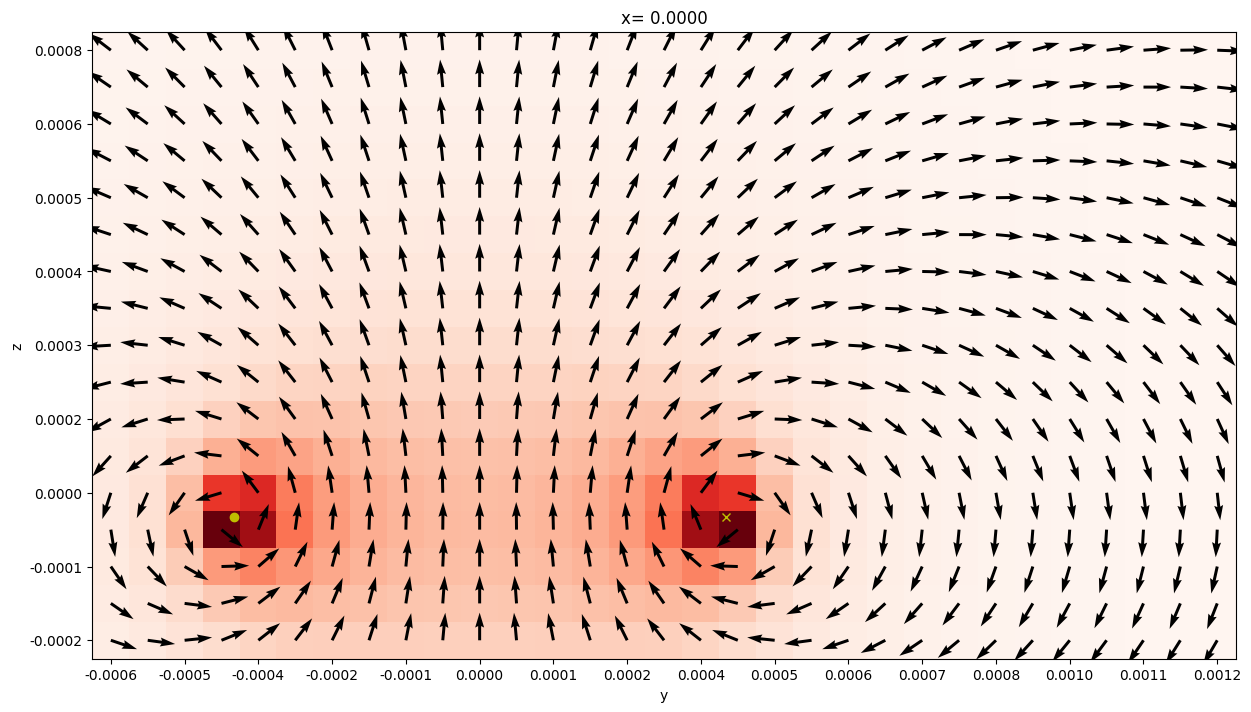

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

# Scaled coordinate / not absolute coordinate, for loop plot
cix = 0; print('cix: x= {:.2f}'.format(Xs[cix]))
ciy = abs( (0 - Ys[0])/res )
ciz = len(Zs) - abs((0 - Zs[0])/res) - 1
ciR = R/res

# x = Xs[i]
i = 0
plt.subplot(1,1,1)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('x= {:.4f}'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')
ax.set_xticks(list(range(len(Ys)))[::2])             # Tick every other points
ax.set_xticklabels(["{:.4f}".format(y) for y in Ys[::2]])
ax.set_yticks(list(range(len(Zs)))[::2])             # Tick every other points
ax.set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::2]])

# plt.colorbar(im)
plt.quiver(uBy[i,:,::-1].T, uBz[i,:,::-1].T)

markL = 'o'
markR = 'x'
if CurrentI < 0:
    markR = 'x'
    markL = 'o'

plt.plot([ ciy - ciR ], [ ciz ], 'y'+markL)
plt.plot([ ciy + ciR ], [ ciz ], 'y'+markR)

ax.set_aspect( 1 )
plt.show()

cix: x= 0.00


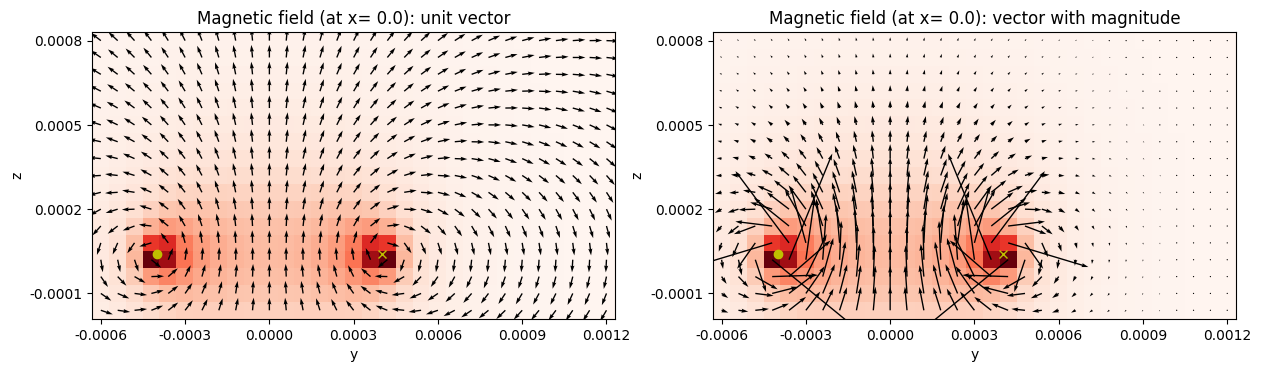

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

# Scaled coordinate / not absolute coordinate, for loop plot
cix = 0; print('cix: x= {:.2f}'.format(Xs[cix]))
ciy = abs( (0 - Ys[0])/res )
ciz = len(Zs) - abs((0 - Zs[0])/res) - 1
ciR = R/res

# x = Xs[i]
i = 0
plt.subplot(1,2,1)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('Magnetic field (at x= {:.1f}): unit vector'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')
m = 5

ax[0].set_xticks(list(range(len(Ys)))[::m])             # Tick every other points
ax[0].set_xticklabels(["{:.4f}".format(y) for y in Ys[::m]])
ax[0].set_yticks(list(range(len(Zs)))[::m])             # Tick every other points
ax[0].set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::m]])
ax[0].set_aspect( 1 )

# plt.colorbar(im)
plt.quiver(uBy[i,:,::-1].T, uBz[i,:,::-1].T)

markL = 'o'
markR = 'x'
if CurrentI < 0:
    markR = 'x'
    markL = 'o'

plt.plot([ ciy - ciR ], [ ciz ], 'y'+markL)
plt.plot([ ciy + ciR ], [ ciz ], 'y'+markR)



plt.subplot(1,2,2)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('Magnetic field (at x= {:.1f}): vector with magnitude'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')

ax[1].set_xticks(list(range(len(Ys)))[::m])             # Tick every m points
ax[1].set_xticklabels(["{:.4f}".format(y) for y in Ys[::m]])
ax[1].set_yticks(list(range(len(Zs)))[::m])             # Tick every m points
ax[1].set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::m]])
ax[1].set_aspect( 1 )

# plt.colorbar(im)
plt.quiver(By[i,:,::-1].T, Bz[i,:,::-1].T)

markL = 'o'
markR = 'x'
if CurrentI < 0:
    markR = 'x'
    markL = 'o'

plt.plot([ ciy - ciR ], [ ciz ], 'y'+markL)
plt.plot([ ciy + ciR ], [ ciz ], 'y'+markR)

plt.show()

In [ ]:
print(res)
print(len(Ys))
print(len(Zs))
print(Zs)

6e-05
31
17
[-2.0e-04 -1.4e-04 -8.0e-05 -2.0e-05  4.0e-05  1.0e-04  1.6e-04  2.2e-04
  2.8e-04  3.4e-04  4.0e-04  4.6e-04  5.2e-04  5.8e-04  6.4e-04  7.0e-04
  7.6e-04]


# Solenoid by Current Loops
<a class="anchor" id="SolenoidByCurrentLoops"></a>

## ```Solenoid``` class

In [9]:
class Solenoid:
    def __init__(self, radiusR, currentI, mu0, numTurnsN, lengthL):
        '''
        Solenoid location center at (0,0) whose ends are at z=0 and z=L.
        Approximate a magnetic field of solenoid of N turns by N current loops.

            B_total = sum_n B_n
        where B_n is a magnetic field caused by the nth current loop.        
        Current loops are assumed to be evenly align along z-axis from z=0 to z=L.
        '''

        self.R = radiusR
        self.I = currentI
        self.mu0 = mu0
        self.N = numTurnsN
        self.L = lengthL

        self.Zs = []    # all current loop locations along z-axis
        z_step = self.L/(self.N - 1)
        z = 0
        for i in range(self.N):
            self.Zs.append(z)
            z += z_step
        # end for i

    def compute_B(self, X, Y, Z, N=1000):

        # Total B
        BTx = 0
        BTy = 0
        BTz = 0

        for i in range(self.N):
            # Define current loops.
            cl = CurrentLoop(self.Zs[i], self.R, self.I, self.mu0)
            
            # Compute B
            Bx, By, Bz = cl.compute_B(X, Y, Z, N)

            BTx += Bx
            BTy += By
            BTz += Bz
            
        # end for i

        return BTx, BTy, BTz
    # end def
# end class

In [ ]:
mu0 = 4e-7 * pi

res = 0.0003
R = 0.004
CurrentI = 1.8
Nturns = 10
lengthL = 0.01

# Make it an odd number and avoid R (touch the loop)
Xs = np.arange(0, res, res)
# Xs = np.arange(-R*20, R*20, res)                                            
Ys = np.arange(-R*1.5, R*3, res)
Zs = np.arange(-0.1*lengthL, 1.3*lengthL, res)
print(len(Xs))
print(len(Ys))
print(len(Zs))

1
61
47


In [ ]:
# Test Solenoid
s = Solenoid(R, CurrentI, mu0, Nturns, lengthL)

In [ ]:
print(s.R)
print(s.I)
print(s.mu0)
print(s.N)
print(s.L)
print(s.Zs)

0.004
1.8
1.2566370614359173e-06
10
0.01
[0, 0.0011111111111111111, 0.0022222222222222222, 0.003333333333333333, 0.0044444444444444444, 0.005555555555555556, 0.006666666666666667, 0.007777777777777778, 0.008888888888888889, 0.01]


In [ ]:
Bx, By, Bz = s.compute_B(Xs, Ys, Zs, N=100)
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

~ 1 min

cix: x= 0.00


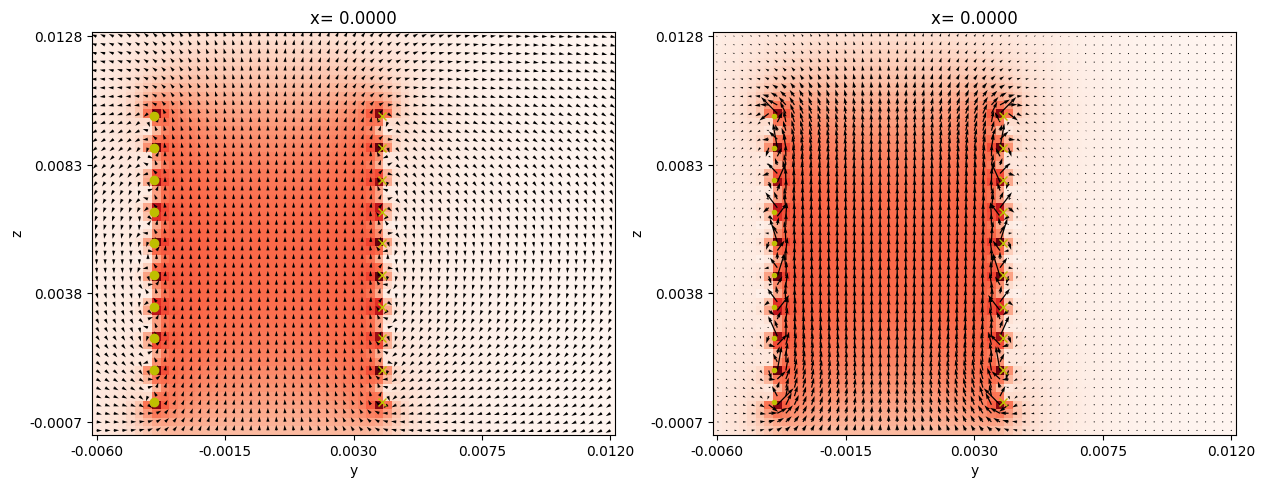

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

# Scaled coordinate / not absolute coordinate, for loop plot
cix = 0; print('cix: x= {:.2f}'.format(Xs[cix]))
ciy = abs( (0 - Ys[0])/res )
ciz = len(Zs) - abs((0 - Zs[0])/res) - 1
ciR = R/res

# x = Xs[i]
i = 0
plt.subplot(1,2,1)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('x= {:.4f}'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')
m = 15

ax[0].set_xticks(list(range(len(Ys)))[::m])             # Tick every other points
ax[0].set_xticklabels(["{:.4f}".format(y) for y in Ys[::m]])
ax[0].set_yticks(list(range(len(Zs)))[::m])             # Tick every other points
ax[0].set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::m]])
ax[0].set_aspect( 1 )

# plt.colorbar(im)
plt.quiver(uBy[i,:,::-1].T, uBz[i,:,::-1].T)

markL = 'o'
markR = 'x'
if CurrentI < 0:
    markR = 'x'
    markL = 'o'

plt.plot([ ciy - ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markL)
plt.plot([ ciy + ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markR)

plt.subplot(1,2,2)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('x= {:.4f}'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')

ax[1].set_xticks(list(range(len(Ys)))[::m])             # Tick every m points
ax[1].set_xticklabels(["{:.4f}".format(y) for y in Ys[::m]])
ax[1].set_yticks(list(range(len(Zs)))[::m])             # Tick every m points
ax[1].set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::m]])
ax[1].set_aspect( 1 )

# plt.colorbar(im)
plt.quiver(By[i,:,::-1].T, Bz[i,:,::-1].T)

markL = '.'
markR = 'x'
if CurrentI < 0:
    markR = 'x'
    markL = '.'

plt.plot([ ciy - ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markL)
plt.plot([ ciy + ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markR)

plt.show()

## Pretty plot

In [ ]:
mu0 = 4e-7 * pi

res = 0.00006
R = 0.0004
CurrentI = 3
Nturns = 20
lengthL = 0.0005

# Make it an odd number and avoid R (touch the loop)
Xs = np.arange(0, res, res)
# Xs = np.arange(-R*20, R*20, res)                                            
Ys = np.arange(-R*1.5, R*3, res)
Zs = np.arange(-R*0.5, R*2, res)
print(len(Xs))
print(len(Ys))
print(len(Zs))

1
31
17


In [ ]:
s = Solenoid(R, CurrentI, mu0, Nturns, lengthL)

In [ ]:
Bx, By, Bz = s.compute_B(Xs, Ys, Zs, N=100)
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

cix: x= 0.00


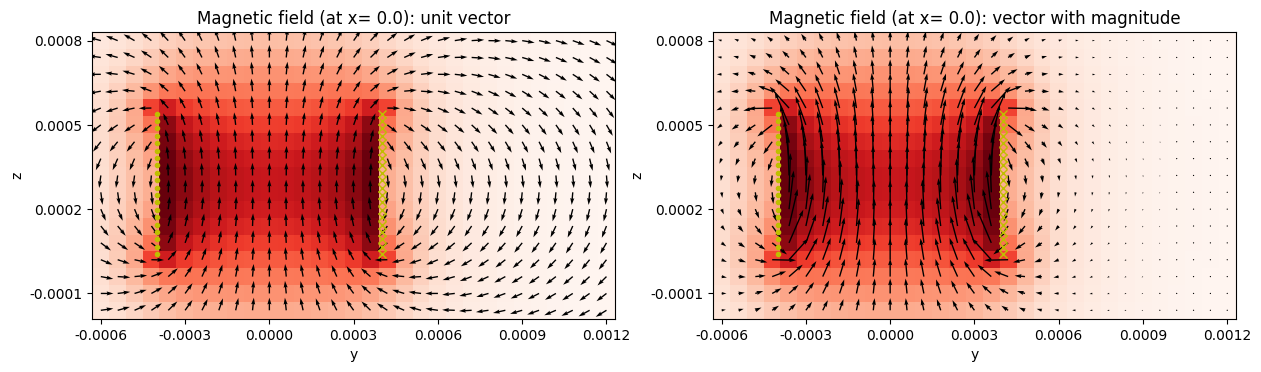

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

# Scaled coordinate / not absolute coordinate, for loop plot
cix = 0; print('cix: x= {:.2f}'.format(Xs[cix]))
ciy = abs( (0 - Ys[0])/res )
ciz = len(Zs) - abs((0 - Zs[0])/res) - 1
ciR = R/res

# x = Xs[i]
i = 0
plt.subplot(1,2,1)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('Magnetic field (at x= {:.1f}): unit vector'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')
m = 5

ax[0].set_xticks(list(range(len(Ys)))[::m])             # Tick every other points
ax[0].set_xticklabels(["{:.4f}".format(y) for y in Ys[::m]])
ax[0].set_yticks(list(range(len(Zs)))[::m])             # Tick every other points
ax[0].set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::m]])
ax[0].set_aspect( 1 )

# plt.colorbar(im)
plt.quiver(uBy[i,:,::-1].T, uBz[i,:,::-1].T)

markL = '.'
markR = 'x'
if CurrentI < 0:
    markR = 'x'
    markL = '.'

plt.plot([ ciy - ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markL)
plt.plot([ ciy + ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markR)



plt.subplot(1,2,2)
im = plt.imshow(magB[i,:,::-1].T, cmap = 'Reds' , interpolation = 'nearest' )
plt.title('Magnetic field (at x= {:.1f}): vector with magnitude'.format(Xs[i]))
plt.xlabel('y')
plt.ylabel('z')

ax[1].set_xticks(list(range(len(Ys)))[::m])             # Tick every m points
ax[1].set_xticklabels(["{:.4f}".format(y) for y in Ys[::m]])
ax[1].set_yticks(list(range(len(Zs)))[::m])             # Tick every m points
ax[1].set_yticklabels(["{:.4f}".format(z) for z in Zs[::-1][::m]])
ax[1].set_aspect( 1 )

# plt.colorbar(im)
plt.quiver(By[i,:,::-1].T, Bz[i,:,::-1].T)

markL = '.'
markR = 'x'
if CurrentI < 0:
    markR = 'x'
    markL = '.'

plt.plot([ ciy - ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markL)
plt.plot([ ciy + ciR ]*s.N, ciz-np.array(s.Zs)/res, 'y'+markR)

plt.show()

## Compare to the standard formula

Inside solenoid, $|\vec{B}| = \frac{\mu_0 N I}{\ell}$.

See derviation from [Dan Fleisch's Ex 4.2](https://www.danfleisch.com/maxwell/chapter4/problem2/)

In [ ]:
Ys.shape

(31,)

In [21]:
def std_solenoid(RadiusR, CurrentI, mu0, Nturns, lengthL, y):
    '''
    Approximate the magnetic field inside solenoid.
    Outside solenoid, the magnetic field is approximated to be 0 
    '''

    B = mu0*Nturns*CurrentI/lengthL

    Bs = np.array([B* (-RadiusR < yi < RadiusR) for yi in np.array(y).reshape((-1,))])
    return Bs

In [ ]:
Bs = std_solenoid(R, CurrentI, mu0, Nturns, lengthL, Ys)
print(Bs)

[0.         0.         0.         0.         0.15079645 0.15079645
 0.15079645 0.15079645 0.15079645 0.15079645 0.15079645 0.15079645
 0.15079645 0.15079645 0.15079645 0.15079645 0.15079645 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [ ]:
N = 100
# x = 0 passing through the center of the solenoid
# z = L/2 passing through the middle of the solenoid

Bx, By, Bz = s.compute_B([0], Ys, [s.L/2], N=100) 
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

In [ ]:
magB.shape

(1, 31, 1)

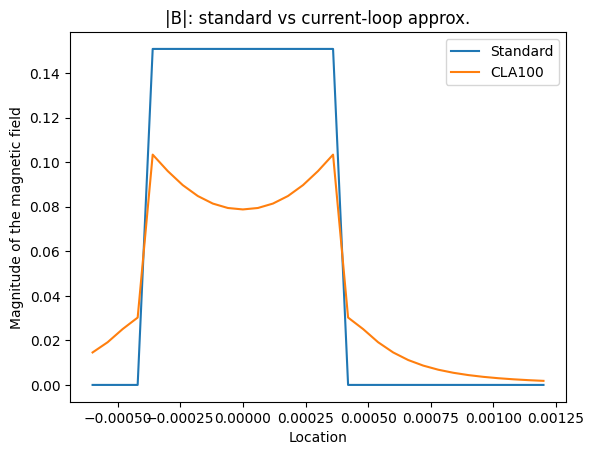

In [ ]:
plt.plot(Ys, Bs)
plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('|B|: standard vs current-loop approx.')

plt.plot(Ys, magB[0,:,0])

plt.legend(['Standard', 'CLA{}'.format(N)])

### Find a number of subintervals

Try increasing a a number of subintervals and see how different the results are.

In [ ]:
MagBs = []
Ns = [10, 100, 1000, 2000, 4000]
for N in Ns:
    Bx, By, Bz = s.compute_B([0], Ys, [s.L/2], N) 
    uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)
    MagBs.append(magB)

# ~40s

It may take around 45s.

Max |B| = 0.24588409152130072
Max |B| = 0.1033573415020934
Max |B| = 0.10336095090403762
Max |B| = 0.10336095090403756
Max |B| = 0.10336095090403757


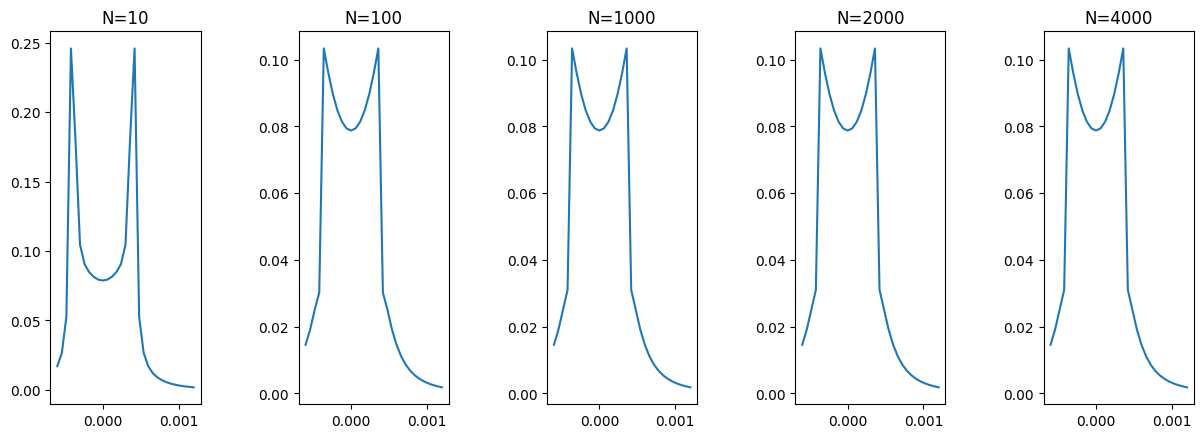

In [ ]:
fig, ax = plt.subplots(1, 5)
fig.tight_layout(rect=[0.1, 0.1, 2, 1], h_pad=4, w_pad=4)

plot_code = ['r:', 'm.-', 'b--']
for i, magB in enumerate(MagBs):
    plt.subplot(1,5,i+1)
    plt.plot(Ys, magB[0,:,0])
    plt.title('N={}'.format(Ns[i]))
    print('Max |B| =', np.max(magB))


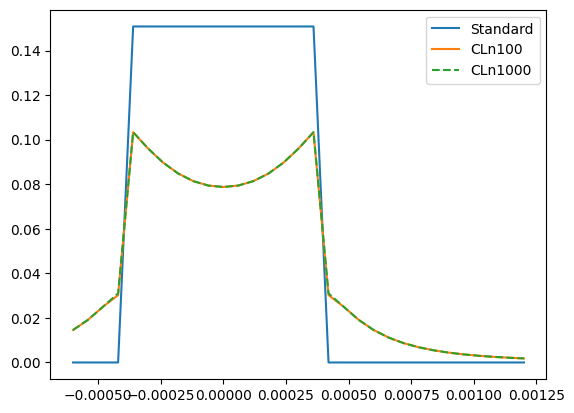

In [ ]:
plt.plot(Ys, Bs)
Lstyles = ['-', '--']

for i, magB in enumerate(MagBs[1:-2]):
    plt.plot(Ys, magB[0,:,0], linestyle =Lstyles[i])

plt.legend(['Standard', 'CLn100', 'CLn1000', 'CLn2000', 'CLn4000'])

This shows that a choice of 100 subintervals seems to be sufficient.

# Standard vs current-loop approximation

## R = 0.8 cm

In [ ]:
mu0 = 4e-7 * pi

res = 0.0001
R = 0.008
CurrentI = 3
Nturns = 20
lengthL = 0.02

# Make it an odd number and avoid R (touch the loop)
Ys = np.arange(-R*5, R*5, res)
print(len(Ys))

800


In [ ]:
Bs = std_solenoid(R, CurrentI, mu0, Nturns, lengthL, Ys)

In [ ]:
N = 100

s = Solenoid(R, CurrentI, mu0, Nturns, lengthL)
Bx, By, Bz = s.compute_B([0], Ys, [s.L/2], N) 
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)


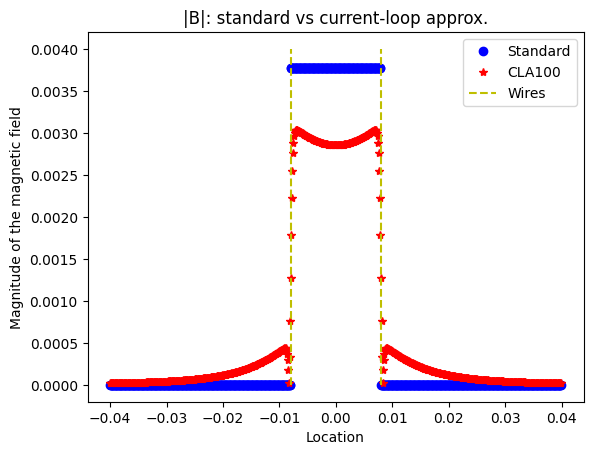

In [ ]:
plt.plot(Ys, Bs, 'bo')
plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('|B|: standard vs current-loop approx.')

plt.plot(Ys, magB[0,:,0], 'r*')

plt.plot([-R, -R], [0, 0.004], 'y--')
plt.plot([R, R], [0, 0.004], 'y--')

plt.legend(['Standard', 'CLA{}'.format(N), 'Wires'])

Note on the right edge, current-loop approximation seems to be short that may be from the computing resolution ```res```.

So far, the current-loop approximation seems pretty promising.

In [ ]:
Rs = [R]
stdBs = [Bs]
claBs = [magB[0,:,0]]

# Approaching an ideal solenoid

Length gets longer and radius gets smaller. 
I'll try just radius gets smaller.**bold text**

## R = 0.4 cm

In [ ]:
mu0 = 4e-7 * pi

res = 0.0001
R = 0.004
CurrentI = 3
Nturns = 20
lengthL = 0.02

# Make it an odd number and avoid R (touch the loop)
Ys = np.arange(-R*5, R*5, res)
print(len(Ys))

400


In [ ]:
Bs = std_solenoid(R, CurrentI, mu0, Nturns, lengthL, Ys)

In [ ]:
N = 100

s = Solenoid(R, CurrentI, mu0, Nturns, lengthL)
Bx, By, Bz = s.compute_B([0], Ys, [s.L/2], N) 
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)


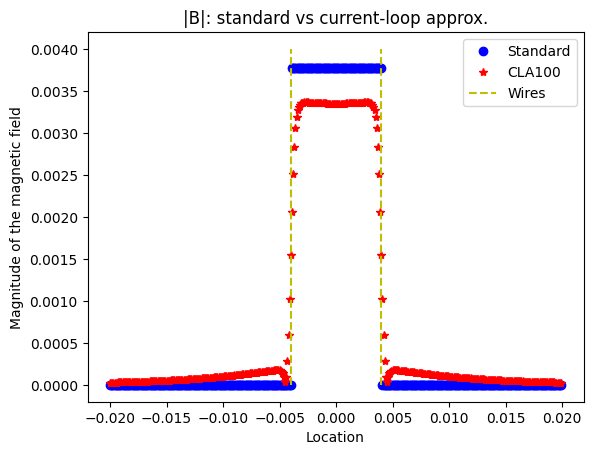

In [ ]:
plt.plot(Ys, Bs, 'bo')
plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('|B|: standard vs current-loop approx.')

plt.plot(Ys, magB[0,:,0], 'r*')

plt.plot([-R, -R], [0, 0.004], 'y--')
plt.plot([R, R], [0, 0.004], 'y--')

plt.legend(['Standard', 'CLA{}'.format(N), 'Wires'])

In [ ]:
Rs.append(R)
stdBs.append(Bs)
claBs.append(magB[0,:,0])

## R = 0.2 cm

In [ ]:
mu0 = 4e-7 * pi

res = 0.0001
R = 0.002
CurrentI = 3
Nturns = 20
lengthL = 0.02

# Make it an odd number and avoid R (touch the loop)
Ys = np.arange(-R*5, R*5, res)
print(len(Ys))

200


In [ ]:
Bs = std_solenoid(R, CurrentI, mu0, Nturns, lengthL, Ys)

In [ ]:
N = 100

s = Solenoid(R, CurrentI, mu0, Nturns, lengthL)
Bx, By, Bz = s.compute_B([0], Ys, [s.L/2], N) 
uBx, uBy, uBz, magB = unitvec(Bx, By, Bz)

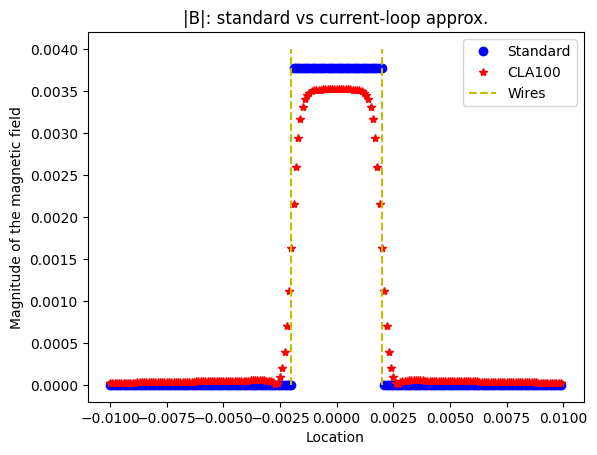

In [ ]:
plt.plot(Ys, Bs, 'bo')
plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('|B|: standard vs current-loop approx.')

plt.plot(Ys, magB[0,:,0], 'r*')

plt.plot([-R, -R], [0, 0.004], 'y--')
plt.plot([R, R], [0, 0.004], 'y--')

plt.legend(['Standard', 'CLA{}'.format(N), 'Wires'])

In [ ]:
Rs.append(R)
stdBs.append(Bs)
claBs.append(magB[0,:,0])

In [ ]:
Rs

[0.008, 0.004, 0.002]

## Various radii

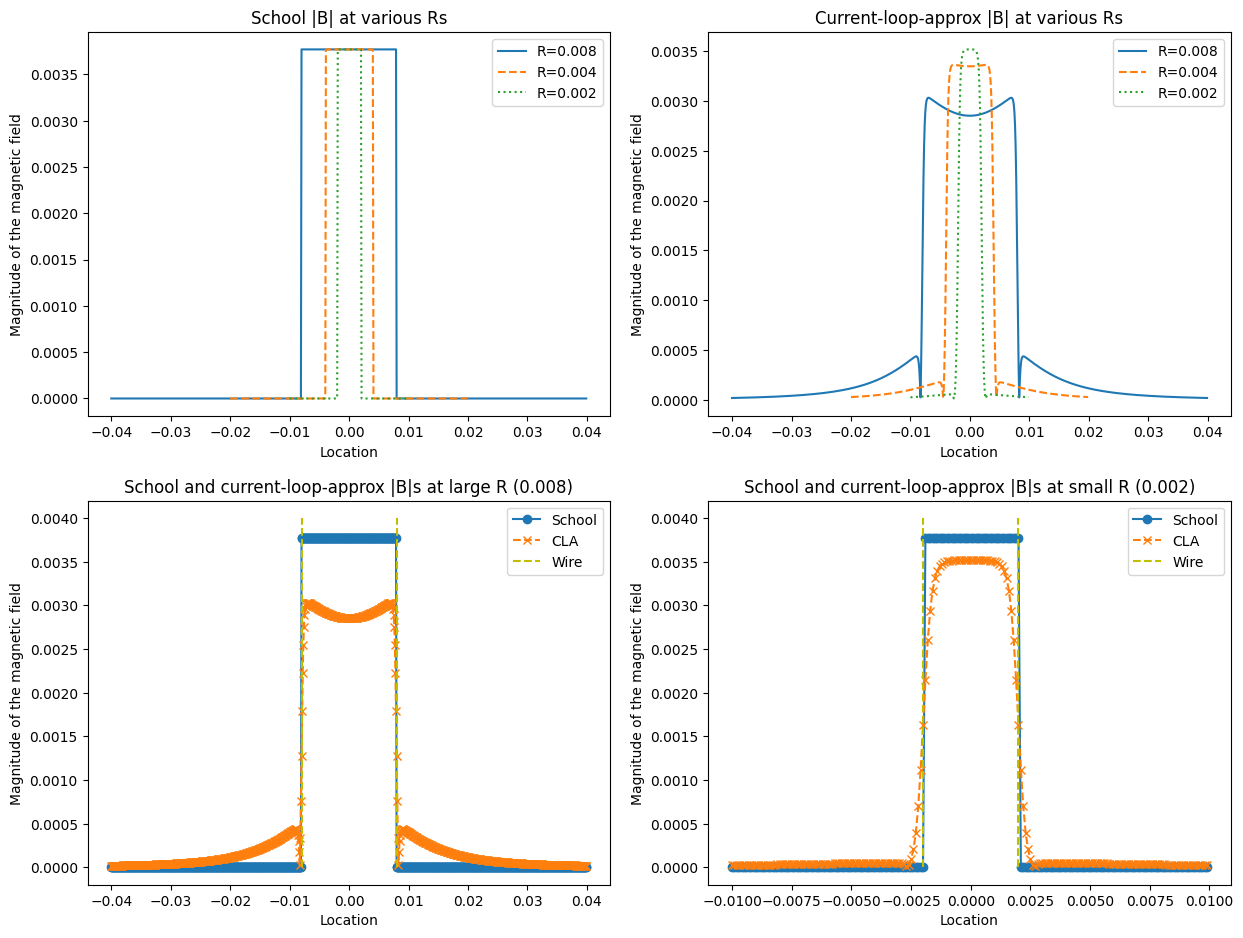

In [ ]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(rect=[0.1, 0.1, 2, 2], h_pad=4, w_pad=4)

ps = ['-', '--', ':']
plt.subplot(2,2,1)
for i, Bs in enumerate(stdBs):
    Ys = np.arange(-Rs[i]*5, Rs[i]*5, res)[:len(Bs)]
    plt.plot(Ys, Bs, ps[i])
plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('School |B| at various Rs')
plt.legend(["R={}".format(R) for R in Rs])

ps = ['-', '--', ':']
plt.subplot(2,2,2)
for i, Bs in enumerate(claBs):
    Ys = np.arange(-Rs[i]*5, Rs[i]*5, res)[:len(Bs)]
    plt.plot(Ys, Bs, ps[i])
plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('Current-loop-approx |B| at various Rs')
plt.legend(["R={}".format(R) for R in Rs])

plt.subplot(2,2,3)

i = 0
Bs = stdBs[i]
Ys = np.arange(-Rs[i]*5, Rs[i]*5, res)[:len(Bs)]
plt.plot(Ys, Bs, 'o-')

Bs = claBs[i]
Ys = np.arange(-Rs[i]*5, Rs[i]*5, res)[:len(Bs)]
plt.plot(Ys, Bs, 'x--')


R = Rs[i]
plt.plot([-R, -R], [0, 0.004], 'y--')
plt.plot([R, R], [0, 0.004], 'y--')


plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('School and current-loop-approx |B|s at large R ({})'.format(R))
plt.legend(['School', 'CLA', 'Wire'])


plt.subplot(2,2,4)

i = -1
Bs = stdBs[i]
Ys = np.arange(-Rs[i]*5, Rs[i]*5, res)[:len(Bs)]
plt.plot(Ys, Bs, 'o-')

Bs = claBs[i]
Ys = np.arange(-Rs[i]*5, Rs[i]*5, res)[:len(Bs)]
plt.plot(Ys, Bs, 'x--')

R = Rs[i]
plt.plot([-R, -R], [0, 0.004], 'y--')
plt.plot([R, R], [0, 0.004], 'y--')


plt.xlabel('Location')
plt.ylabel('Magnitude of the magnetic field')
plt.title('School and current-loop-approx |B|s at small R ({})'.format(R))
plt.legend(['School', 'CLA', 'Wire'])


# Conclusion

* Current-loop approximation leads to a more realistic result: outside flux whose magnitude fades as a function of distance from the solenoid.

* The current-loop approximation results converge to a "school" formula as a solenoid radius $R$ gets smaller.

# EMF

Adapted from Problem 3.5 of Dan Fleisch’s A Student’s Guide to Maxwell Equations, Cambridge University Press 2008. See the book website: http://www.danfleisch.com/maxwell/chapter3/problem5/ for detail . 

To understand electromotive force or induced voltage by electromagnetism, consider the following setting.
A circular loop of wire with radius $ρ_0$ and resistance of $R_0$ Ω surrounds an $N$-turn solenoid of length $L$ and diameter $D$

![Circular loop encircled solenoid](http://www.danfleisch.com/maxwell/chapter3/problem5/1.gif)

If the current $I$ in the solenoid changes linearly from $I_1$ to $I_2$ mA in $\tau$ seconds, the maximum current induced in the circular wire can be computed as follows. 
Given Maxwell 3rd equation

$$emf = \oint_C \vec{E} \cdot d\ell = - \frac{\partial }{\partial t} \int_S \vec{B} \cdot \hat{n} dA $$

The right-hand side is integral of a magnetic field passing through a surface area $A$, formed by a closed loop $\ell$ that $emf$ is induced. It may be better to see an example to understand a relation in an integral of a field over an area.

It is easier using a common parameter to relate a closed loop $\ell$, a covered area $A$, and magnetic field $\vec{B}$ 
Denote $\vec{B}(\rho)$ as a function of loop radius $\rho$. 
Formulate covered area $A = \pi \rho^2$ and loop $\ell = 2 \pi \rho$. 
Suppose the loop is aligned such that its normal vector $\hat{n} = \hat{z}$. Then we have

$$emf = -\frac{\partial }{\partial t} \int_0^{\rho_0} \vec{B} \cdot \hat{z} 2 \pi \rho d \rho $$

Let $\vec{B}(\rho) \equiv \vec{B}(0, \rho, L/2)$.

In [39]:
def Brho(coil, rho):
    '''
    B(rho) = B(0, rho, L/2)
    rho in meter.
    '''
    Nsubs = 100 # A number of subintervals, for numerical integration

    _, _, Bz = coil.compute_B([0], rho, [coil.L/2], Nsubs)
    return Bz

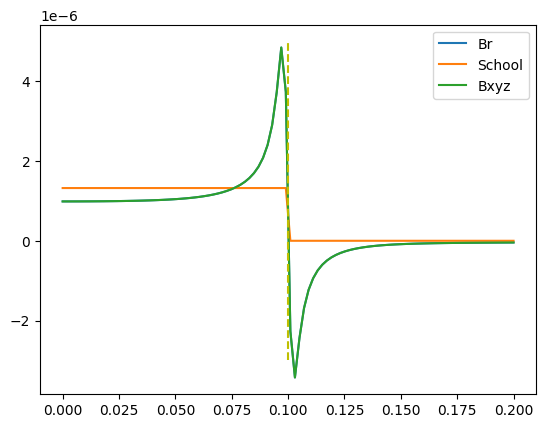

In [40]:
# Test
mu0 = 4e-7 * pi

radiusR = 10e-2
currentI = 80e-3
numTurnsN = 5
lengthL = 38e-2

s1 = Solenoid(radiusR, currentI, mu0, numTurnsN, lengthL)
rhos = np.linspace(0, 20e-2, 100)
Bz = Brho(s1, rhos)
plt.plot(rhos, Bz[0,:,0])

Bschool = std_solenoid(radiusR, currentI, mu0, numTurnsN, lengthL, rhos)
plt.plot(rhos, Bschool)

#
_, _, Bz = s1.compute_B([0], rhos, [s1.L/2], 100)
plt.plot(rhos, Bz[0,:,0])

plt.plot([10e-2]*2, [-3e-6, 5e-6], 'y--')

plt.legend(['Br', 'School', 'Bxyz'])

In [51]:
def circloop_emf(rho0, R0, D, L, N, I1, I2, tau, mu0):

    # Work out the units
    # cm -> m
    rho0 = 0.01*rho0
    D = 0.01*D
    L = 0.01*L

    emf = 0
    Ic = 0

    Nsubs = 100 # A number of subintervals, for numerical integration

    # Setup solenoid
    s1 = Solenoid(D/2, I1, mu0, N, L)
    s2 = Solenoid(D/2, I2, mu0, N, L)

    # Set up dPhi functions: body of the integrals
    # Note: call Brho with [r] to make it a collection, having ```len``` method.
    # A more efficient numerical integration could make it much faster.
    dPhi1 = lambda r: Brho(s1, [r])*2*np.pi*r
    dPhi2 = lambda r: Brho(s2, [r])*2*np.pi*r
    
    # Compute phi's
    phi1 = integrate_n(dPhi1, 0, rho0, Nsubs)
    phi2 = integrate_n(dPhi2, 0, rho0, Nsubs)

    # Compute emf
    emf = - (phi2 - phi1)/tau
    Ic = emf/R0

    return emf, Ic

In [52]:
# Test
mu0 = 4e-7 * pi

circularR = 20 #cm
R0 = 12 #Ohm

solenoidR = 10 #cm
numTurnsN = 5
lengthL = 38 #cm

currentI1 = 80e-3 
currentI2 = 300e-3
tau = 2 #sec

emf, Ic = circloop_emf(rho0=circularR, R0=R0, 
                          D=solenoidR*2, L=lengthL, N=numTurnsN, 
                          I1=currentI1, I2=currentI2, tau=tau, mu0=mu0)

print(emf[0,0,0], 'V')
print(Ic[0,0,0], 'A')


-3.6300263282862486e-08 V
-3.0250219402385406e-09 A


http://www.danfleisch.com/maxwell/chapter3/problem5/

* Solution using "school", $B = \frac{\mu_0 N I}{\ell}$
  * emf = -5.7e-8 V
  * Ic = -4.8e-9 A

In [60]:
# Test
mu0 = 4e-7 * pi

circularR = 9.55 #cm
R0 = 12 #Ohm

solenoidR = 10 #cm
numTurnsN = 5
lengthL = 38 #cm

currentI1 = 80e-3 
currentI2 = 300e-3
tau = 2 #sec

emf, Ic = circloop_emf(rho0=circularR, R0=R0, 
                          D=solenoidR*2, L=lengthL, N=numTurnsN, 
                          I1=currentI1, I2=currentI2, tau=tau, mu0=mu0)

print(emf[0,0,0], 'V')
print(Ic[0,0,0], 'A')


-5.679975917793386e-08 V
-4.733313264827822e-09 A


In [64]:
# Test
mu0 = 4e-7 * pi

circularR = 200000000000000000 #cm
R0 = 12 #Ohm

solenoidR = 10 #cm
numTurnsN = 5
lengthL = 38 #cm

currentI1 = 80e-3 
currentI2 = 300e-3
tau = 2 #sec

emf, Ic = circloop_emf(rho0=circularR, R0=R0, 
                          D=solenoidR*2, L=lengthL, N=numTurnsN, 
                          I1=currentI1, I2=currentI2, tau=tau, mu0=mu0)

print(emf[0,0,0], 'V')
print(Ic[0,0,0], 'A')


4.372999043648896e-22 V
3.644165869707414e-23 A


In [69]:
# Test
mu0 = 4e-7 * pi

R0 = 12 #Ohm

solenoidR = 10 #cm
numTurnsN = 5
lengthL = 38 #cm

currentI1 = 80e-3 
currentI2 = 300e-3
tau = 2 #sec

circularRs = np.linspace(0, 5*solenoidR, 20)
emfs = []
for circR in circularRs:

    emf, Ic = circloop_emf(rho0=circR, R0=R0, 
                              D=solenoidR*2, L=lengthL, N=numTurnsN, 
                              I1=currentI1, I2=currentI2, tau=tau, mu0=mu0)

    emfs.append(emf[0,0,0])

Text(0.5, 1.0, 'EMF versus circular-loop radius')

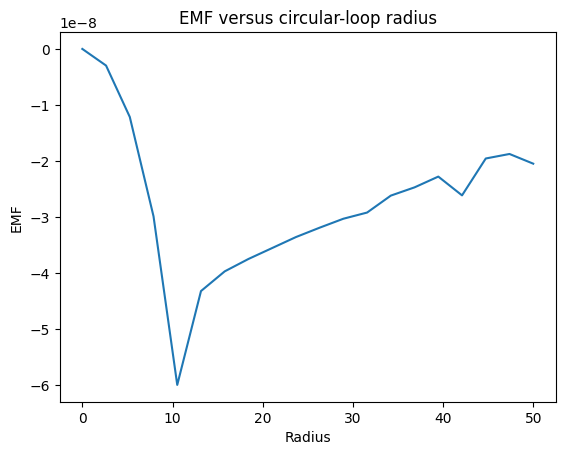

In [73]:
plt.plot(circularRs, emfs)
plt.xlabel('Radius')
plt.ylabel('EMF')
plt.title('EMF versus circular-loop radius')

# plt.plot([solenoidR]*2, [np.min(emfs), np.max(emfs)], 'y--')
# plt.legend(['emf', 'solenoid'])

As circular loop gets larger from the center of the solenoid, its emf gets stronger till it reaches the solenoid boundary. As circular loop gets larger than the solenoid, its emf gets weaker.

This makes sense: fluxes outside solenoid run in opposite direction.
Eventually, as circular loop is large enough, it won't be effectively experiencing emf from the solenoid anymore.

# More efficient numerical integration

```integrate_n``` evaluates ```fx``` one value at a time, while many functions can do multiple evaluations.

In [ ]:
def integrate_n(fx, xa, xb, n):
    '''
    Numerical integration with midpoint rule.
    fx: a function to be integrated.
    xa: an initial point of integration.
    xb: a final point of integration.
    n: a number of subintevals.
    '''

    dx = (xb - xa)/n

    # lower end of the subinterval
    sl = xa
    Mn = 0
    for i in range(n):
        mi = sl + dx/2
        Mn += fx(mi) * dx

        # Prep sl for the next subinterval 
        sl = sl + dx
    # end for i
    return Mn

# End